In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Code task 1 
# Load CSV from a local file

df = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/sample_submission_pzljTaX.csv')
df

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0
...,...,...
13855,232281,0
13856,232282,0
13857,232285,0
13858,232286,0


In [3]:
# Code task 2

df[["record_ID", "units_sold"]].nunique()

record_ID     13860
units_sold        1
dtype: int64

In [4]:
# Code task 3
# Load CSV from a local file

df1 = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/test_nfaJ3J5.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [5]:
# Code task 4 
# Load CSV from a local file

df_train = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/train_0irEZ2H.csv')

In [6]:
# Code task 5
# Create a dataframe for the data

df_train = pd.DataFrame(df_train)
df_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [25]:
# Code task 6
# Convert the 'Date' column to datetime format

df_train['week']= pd.to_datetime(df_train['week'])

# Check the format of 'Date' column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          150150 non-null  int64         
 1   index            150150 non-null  int64         
 2   record_ID        150150 non-null  int64         
 3   week             150150 non-null  datetime64[ns]
 4   store_id         150150 non-null  int64         
 5   sku_id           150150 non-null  int64         
 6   total_price      150149 non-null  float64       
 7   base_price       150150 non-null  float64       
 8   is_featured_sku  150150 non-null  int64         
 9   is_display_sku   150150 non-null  int64         
 10  units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 12.6 MB


/var/folders/r1/v87s2wds19l_bvn35s9k8sn80000gn/T/ipykernel_11128/2058080580.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['week']= pd.to_datetime(df_train['week'])


In [54]:
# Code task 7
# Split the week date column to three new year, month, day column - original week column will be removed in later stage
 
df_train['week'] = pd.to_datetime(df_train['week'], dayfirst=True)
 
df_train['year']= df_train['week'].dt.year
df_train['month']= df_train['week'].dt.month
df_train['day']= df_train['week'].dt.day
df_train

,level_0,index,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day
0,0,0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,17
1,1,1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,17
2,2,2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,17
3,3,3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,17
4,4,4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,150145,150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38,2013,9,7
150146,150146,150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30,2013,9,7
150147,150147,150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31,2013,9,7
150148,150148,150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12,2013,9,7


In [55]:
# Code task 8
# Check the format of newly added columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   level_0          150150 non-null  int64         
 1   index            150150 non-null  int64         
 2   record_ID        150150 non-null  int64         
 3   week             150150 non-null  datetime64[ns]
 4   store_id         150150 non-null  int64         
 5   sku_id           150150 non-null  int64         
 6   total_price      150149 non-null  float64       
 7   base_price       150150 non-null  float64       
 8   is_featured_sku  150150 non-null  int64         
 9   is_display_sku   150150 non-null  int64         
 10  units_sold       150150 non-null  int64         
 11  year             150150 non-null  int32         
 12  month            150150 non-null  int32         
 13  day              150150 non-null  int32         
dtypes: datetime64[ns](1)

In [80]:
# Code task 9
# Calculate the total units sold

total = df_train['units_sold'].sum()
total

7758882

In [82]:
# Code task 10
# Calculate total_units_sold by year

print(df_train.groupby('year')['units_sold'].sum())

year
2011    3031385
2012    3071886
2013    1655611
Name: units_sold, dtype: int64


In [83]:
# Code task 11
# Calculate total_units_sold by month

print(df_train.groupby('month')['units_sold'].sum())

month
1     702747
2     862412
3     615777
4     643915
5     869648
6     690137
7     535454
8     570992
9     515508
10    505100
11    651667
12    595525
Name: units_sold, dtype: int64


In [7]:
# Code task 12
# Use df's`select_dtypes` method to select columns of dtype 'object'

df_train.select_dtypes(include = "number")

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,8091,216418,99.0375,111.8625,0,0,20
1,2,8091,216419,99.0375,99.0375,0,0,28
2,3,8091,216425,133.9500,133.9500,0,0,19
3,4,8091,216233,133.9500,133.9500,0,0,44
4,5,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38
150146,212639,9984,223153,235.8375,235.8375,0,0,30
150147,212642,9984,245338,357.6750,483.7875,1,1,31
150148,212643,9984,547934,141.7875,191.6625,0,1,12


In [8]:
# Code task 13
# Check the shape of the data

print(df_train.shape)

(150150, 9)


In [9]:
# Code task 14
# Use pandas' Series method `value_counts` to check the frequency of a category occurred in the data

df_train['record_ID'].value_counts()

record_ID
212644    1
1         1
2         1
3         1
4         1
         ..
17        1
18        1
19        1
22        1
23        1
Name: count, Length: 150150, dtype: int64

In [20]:
#Code task 15
#Use pandas' Series method `value_counts` to check the frequency of a category occurred in the data

df_train['store_id'].value_counts()

store_id
8094    3120
8991    2990
9823    2990
8023    2730
8438    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: count, Length: 76, dtype: int64

In [21]:
# Code task 16
# Use pandas' Series method `value_counts` to check the frequency of a category occurred in the data

df_train['sku_id'].value_counts()

sku_id
219009    9750
216233    9620
219029    9490
223245    9490
222087    9360
217390    9100
222765    8970
216418    8840
216419    8710
216425    8580
245338    8320
223153    7540
300021    5850
245387    5590
320485    5590
378934    4550
547934    4030
219844    3640
217217    3380
217777    2600
398721    2340
300291    1170
679023    1170
546789     910
600934     910
673209     260
327492     260
545621     130
Name: count, dtype: int64

In [12]:
# Code task 17
# Call the info method on df to see a summary of the data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [13]:
# Code task 18
# Call data's `describe` method for a statistical summary of the numerical columns
# Hint: there are fewer summary stat columns than features, so displaying the transpose will be useful again

df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record_ID,150150.0,106271.555504,61386.037861,1.000,53111.2500,106226.5000,159452.7500,212644.0000
store_id,150150.0,9199.422511,615.591445,8023.000,8562.0000,9371.0000,9731.0000,9984.0000
sku_id,150150.0,254761.132468,85547.306447,216233.000,217217.0000,222087.0000,245338.0000,679023.0000
total_price,150149.0,206.626751,103.308516,41.325,130.3875,198.0750,233.7000,562.1625
base_price,150150.0,219.425927,110.961712,61.275,133.2375,205.9125,234.4125,562.1625
is_featured_sku,150150.0,0.095611,0.294058,0.000,0.0000,0.0000,0.0000,1.0000
is_display_sku,150150.0,0.133200,0.339792,0.000,0.0000,0.0000,0.0000,1.0000
units_sold,150150.0,51.674206,60.207904,1.000,20.0000,35.0000,62.0000,2876.0000


In [85]:
# Code task 19
# Check the description of the numerical column units_sold in the DataFrame

df_train.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

# Distribution Of dataset
Our primary focus is to observe the distribution of the data and display any outliers attributes in data.

<Axes: >

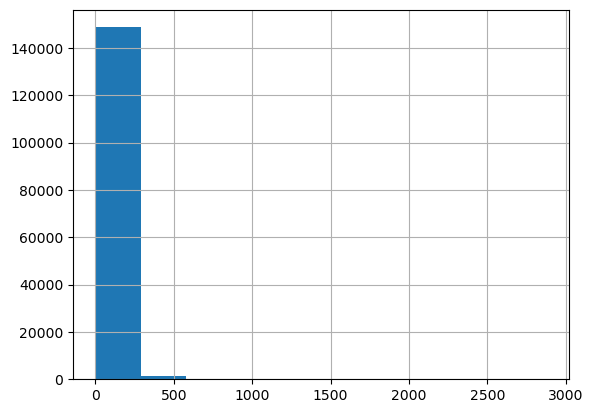

In [87]:
# Code task 20
# Call df_train's `hist` method to plot histograms to check if there are any outliers in column units_sold

df_train.units_sold.hist()

<Axes: >

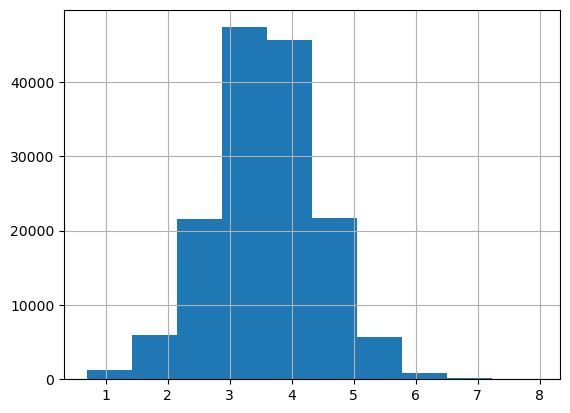

In [16]:
# Code task 21 
# Normalize the data

np.log1p(df_train['units_sold']).hist()

<Axes: >

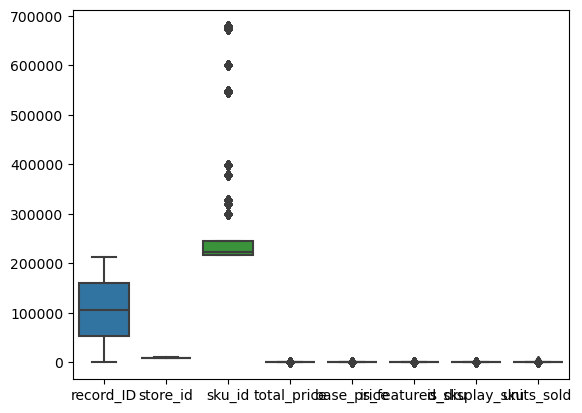

In [17]:
# Code task 22
# Create a seaborn boxplot of the df_train dataframe we created above,to again confirm for the outliers
# in each columns. This will use boxplot's data argument.

sns.boxplot(df_train)

<Axes: >

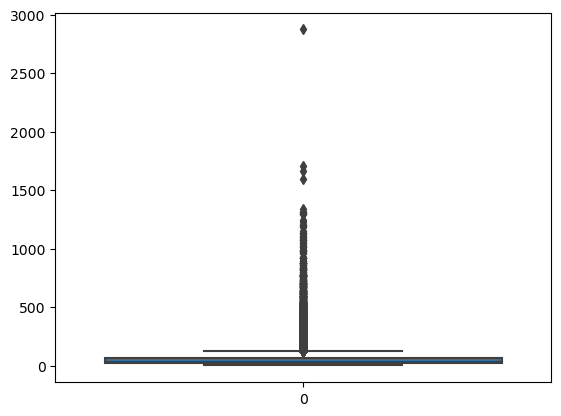

In [18]:
# Code task 23
# Create a seaborn boxplot of the df_train dataframe we created above,to further 
# find any outliers in column units_sold confirm for the outliers

sns.boxplot(df_train['units_sold'])

# Compare the dataset
Our goal is to understand whether the distribution is symmetrical or skewed and display any outliers attributes in data.

<Axes: >

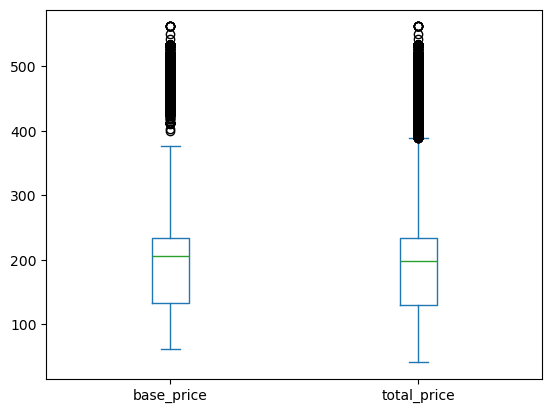

In [89]:
# Code task 24
# Create a boxplot to understand the distributions of two numeric columns 'base_price', 'total_price'
df_train[['base_price', 'total_price']].plot.box()

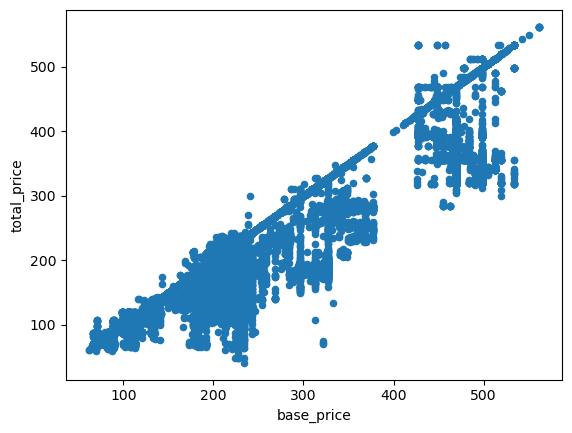

In [93]:
# Code task 25
# Use train data's `plot()` method to create a scatterplot (kind='scatter') with 'base_price' on the x-axis and
#'total_price' on the y-axis
df_train.plot(x="base_price", y="total_price", kind= "scatter");

# Plot Summary
We can make the following conclusions based on the above scatter and box plot.

Above plot clearly depicts that it is a non-symmetrical data as the mean and median are not same and also the length of two whiskers are varied.

For both base_price and total_price, the median is nearly around 200.

For base_price and total_price, the lower quartile is around 120 and upper quartile is around 220, so Interquartile Range should be 100. 

For base_price, the minimum data value is around 50 and maximum data value is around 380.

For total_price, the minimum data value is around 20 and maximum data value is around 390.

There are outliers present at and above 400.

# Target Feature

Since our target feature is units_sold, we need to explore the relationship between year, month and units_sold and check if there's any trends between them.

In [110]:
# Code task 26
# Now use the iloc accessor to extract columns 10, 11, and 12 and the dataframe's `copy()` method

sales = df_train.iloc[:, [6,7,10,11,12]].copy()

sales

,total_price,base_price,units_sold,year,month
0,99.0375,111.8625,20,2011,1
1,99.0375,99.0375,28,2011,1
2,133.9500,133.9500,19,2011,1
3,133.9500,133.9500,44,2011,1
4,141.0750,141.0750,52,2011,1
...,...,...,...,...,...
150145,235.8375,235.8375,38,2013,9
150146,235.8375,235.8375,30,2013,9
150147,357.6750,483.7875,31,2013,9
150148,141.7875,191.6625,12,2013,9


# Compute the mean price and calculate the overall revenue

The average base_price is 219.425927 and to calculate the revenue we use the formula units_sold * base_price

In [111]:
# Code task 27
# Create a new columns average price that will be used to calculate the overall revenue

average_price = 219

sales["average_price"] = average_price

sales["revenue"] = average_price * df_train["units_sold"]

sales

,total_price,base_price,units_sold,year,month,average_price,revenue
0,99.0375,111.8625,20,2011,1,219,4380
1,99.0375,99.0375,28,2011,1,219,6132
2,133.9500,133.9500,19,2011,1,219,4161
3,133.9500,133.9500,44,2011,1,219,9636
4,141.0750,141.0750,52,2011,1,219,11388
...,...,...,...,...,...,...,...
150145,235.8375,235.8375,38,2013,9,219,8322
150146,235.8375,235.8375,30,2013,9,219,6570
150147,357.6750,483.7875,31,2013,9,219,6789
150148,141.7875,191.6625,12,2013,9,219,2628


# Identify trends

Scatterplot to identify the relationship between two data points on yearly and monthly basis

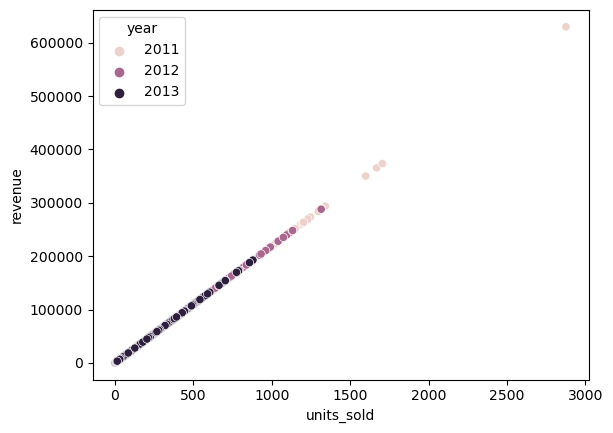

In [142]:
sns.scatterplot(x="units_sold", y="revenue", data= sales, hue = "year");

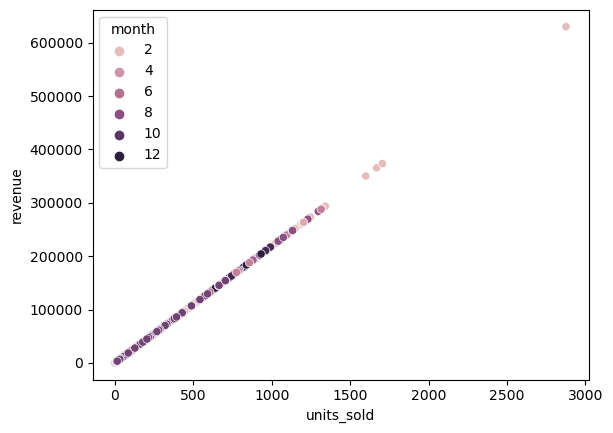

In [143]:
sns.scatterplot(x="units_sold", y="revenue", data= sales, hue = "month");

# Summary from above scatterplot

There's a decline in the sales/units sold from 2011 to 2013 and February has seen the maximum purchases whereas August is the month with least amount of sales.